Mathew Lhotak

In [1]:
## Research question/interests
#I'm interested in looking at certain factors that might influence the outcome of chess games. That is, looking at variables like opening moves, strategies, number of moves in each game.
#Conducting an analysis on these variables might provide useful insight for chess players deciding what they might do to help them win games.


In [23]:
import pandas as pd
import numpy as np

In [28]:
pd.read_csv("chess_games.csv")
rawdf=pd.read_csv("chess_games.csv")
rawdata.head()
rawdata.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

In [ ]:
#Here, I'm interested in looking at types of opening strategies and the outcomes. So, I'll create a new proccessed data set with column of match outcome and opening_shortname

In [61]:
dfcleaned= rawdf[['victory_status', 'opening_shortname']]

In [62]:
dfcleaned

,victory_status,opening_shortname
0,Out of Time,Slav Defense
1,Resign,Nimzowitsch Defense
2,Mate,King's Pawn Game
3,Mate,Queen's Pawn Game
4,Mate,Philidor Defense
...,...,...
20053,Resign,Dutch Defense
20054,Mate,Queen's Pawn
20055,Mate,Queen's Pawn Game
20056,Resign,Pirc Defense


In [67]:
mate= ['Mate']

In [68]:
wongames= dfcleaned[dfcleaned['victory_status'].isin(mate)]

In [69]:
wongames

,victory_status,opening_shortname
2,Mate,King's Pawn Game
3,Mate,Queen's Pawn Game
4,Mate,Philidor Defense
9,Mate,Scandinavian Defense
10,Mate,Van't Kruijs Opening
...,...,...
20049,Mate,French Defense
20051,Mate,French Defense
20054,Mate,Queen's Pawn
20055,Mate,Queen's Pawn Game


<AxesSubplot:xlabel='opening_shortname', ylabel='victory_status'>

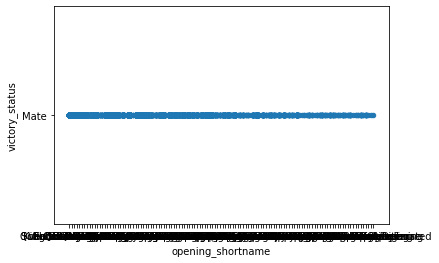

In [63]:
wongames.plot(kind='scatter', x='opening_shortname', y='victory_status')

In [64]:
# IGNORE ABOVE VISUALIZATION
for col in wongames:
    print(wongames['victory_status'].unique())
    
    

['Mate']
['Mate']


In [71]:
wongames['opening_shortname'].value_counts()

Sicilian Defense      721
French Defense        428
Queen's Pawn Game     421
King's Pawn Game      376
Italian Game          309
                     ... 
Australian Defense      1
System                  1
Wade Defense            1
Doery Defense           1
Barnes Opening          1
Name: opening_shortname, Length: 120, dtype: int64

In [73]:
wongames['opening_shortname'].describe()

count                 6325
unique                 120
top       Sicilian Defense
freq                   721
Name: opening_shortname, dtype: object

<AxesSubplot:>

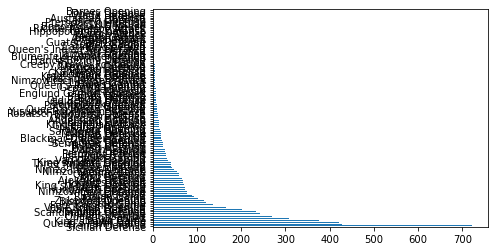

In [74]:
#Here, We can see that the opening strategy that had the highest winrate was the Sicilian Defense
#We can visually see how many games were won by each strategy as well
wongames['opening_shortname'].value_counts().plot(kind='barh')

In [78]:
#This obviously looks gross. I'm interested in, for example, the top 10 strategies that had the highest win count.
dfwongames=wongames['opening_shortname'].value_counts().to_frame()

<AxesSubplot:>

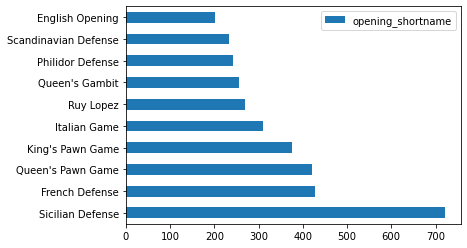

In [87]:
dfwongames[:10].plot(kind='barh')

In [ ]:
#